# Assignment PAI - Image Classification

Image classification task that I was learning , trying different approach this time to see how it performs.

## 0. Import libraries
Import all libraries/packages that you believe will help you fulfil the task, but **for the network only PyTorch can be used.**

In [ ]:
%pip install torchvision


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import os
import random
import collections
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import seaborn as sns
from torch.utils.data import DataLoader
from torchsummary import summary
from collections import Counter
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split


## 1. Dataset
Load the dataset you were given. Images should be stored in an X variable and your labels in a Y variable. Split your dataset into train, validation and test set and pre-process your data for training.

#### Loading one example for each object type from the dataset
Show some images and labels of your dataset

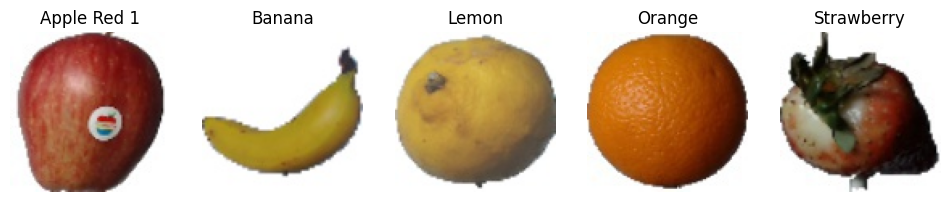

In [13]:

dataset_path = '/mnt/d/PAI/Testing data'

class_names = os.listdir(dataset_path)

samples = {class_name: [] for class_name in class_names}

for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
   
    image_files = [f for f in os.listdir(class_folder) if f.endswith('.jpg')]  
    if image_files:
        
        random_image = random.choice(image_files)
        image_path = os.path.join(class_folder, random_image)
        samples[class_name] = image_path


plt.figure(figsize=(12, 6))
for i, (label, image_path) in enumerate(samples.items(), 1):
    plt.subplot(2, 5, i)
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.show()


#### Splitting the dataset

In [18]:




training_data_path = '/mnt/d/PAI/Training data'
testing_data_path = '/mnt/d/PAI/Testing data'



train_image_paths = [os.path.join(training_data_path, img) for img in os.listdir(training_data_path)]


train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_image_paths,  
    os.listdir(training_data_path),  
    test_size=0.15,  
    random_state=42
)


test_images = os.listdir(testing_data_path)
test_labels = [image.split("_")[0] for image in test_images]


print("Training set size:", len(train_images))
print("Validation set size:", len(validation_images))
print("Testing set size:", len(test_images))


Training set size: 4
Validation set size: 1
Testing set size: 5


#### Pre-processing the dataset (data loader with transformations)

In [19]:

data_dir = '/mnt/d/PAI/Training data'  


transform = transforms.Compose([
    transforms.Resize((100, 100)),  
    transforms.ToTensor(),         
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])


dataset = datasets.ImageFolder(data_dir, transform=transform)


batch_size = 32


train_size = int(0.5 * len(dataset))
val_size = int(0.25 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Testing images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

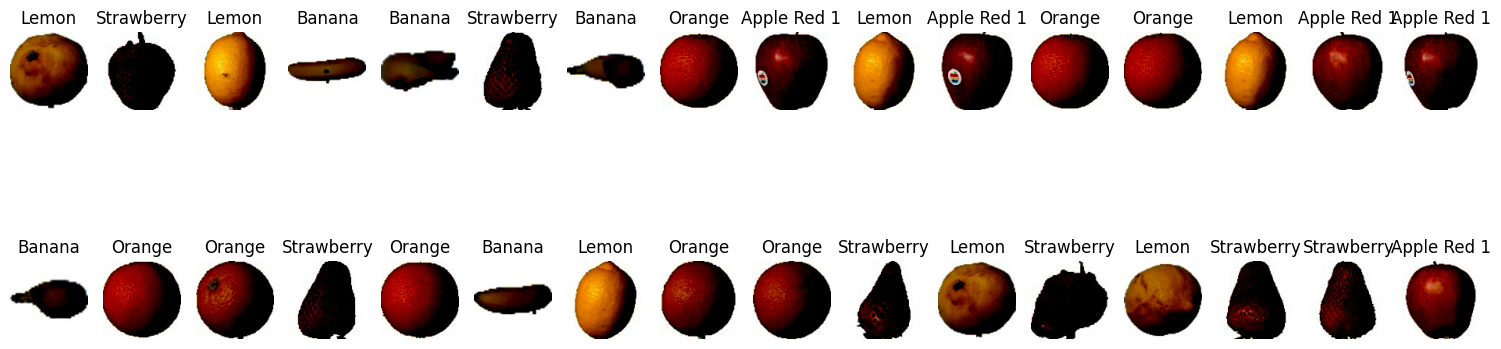

In [20]:

classes = dataset.classes
sample_images, sample_labels = next(iter(train_loader))


import matplotlib.pyplot as plt

num_rows = 2  
num_images = len(sample_labels)

fig, ax = plt.subplots(num_rows, num_images // num_rows, figsize=(15, 6))
for i in range(num_images):
    row = i // (num_images // num_rows)
    col = i % (num_images // num_rows)
    ax[row, col].imshow(sample_images[i].permute(1, 2, 0))
    ax[row, col].set_title(classes[sample_labels[i]])
    ax[row, col].axis('off')


plt.tight_layout()


plt.show()

#### Check the number of images and class balances in the  train, validation and test set

In [21]:

train_labels = [label for _, label in train_dataset]
val_labels = [label for _, label in val_dataset]

train_class_distribution = Counter(train_labels)
val_class_distribution = Counter(val_labels)

print("Training Set Information:")
print(f"Number of images: {len(train_dataset)}")
print(f"Class distribution: {train_class_distribution}")

print("\nValidation Set Information:")
print(f"Number of images: {len(val_dataset)}")
print(f"Class distribution: {val_class_distribution}")


test_labels = [label for _, label in test_dataset]
test_class_distribution = Counter(test_labels)

print("\nTesting Set Information:")
print(f"Number of images: {len(test_dataset)}")
print(f"Class distribution: {test_class_distribution}")

Training Set Information:
Number of images: 1222
Class distribution: Counter({4: 260, 3: 258, 1: 239, 0: 235, 2: 230})

Validation Set Information:
Number of images: 611
Class distribution: Counter({2: 137, 0: 132, 4: 122, 1: 118, 3: 102})

Testing Set Information:
Number of images: 612
Class distribution: Counter({1: 133, 2: 125, 0: 125, 3: 119, 4: 110})


## 2. Convolutional Neural Network Architecture
Load the pre-trained CNN architecture you were given. Reduce the size of the given model by removing some layers and parameters with less influence. Define the optimizer and loss function. Train your network and save it. Remember to use Early stopping and show results.

#### Load the given pre-trained model

In [22]:

mobilenetv2 = models.mobilenet_v2(pretrained=True)

/home/toheed/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/toheed/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### Summary of the given pre-trained model

In [23]:

def move_to_device(model, device):
    model.to(device)
    if device.type == 'cuda':
        model = nn.DataParallel(model)
    return model


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


mobilenetv2 = move_to_device(mobilenetv2, device)


input_data = torch.randn(1, 3, 100, 100).to(device)


from torchsummary import summary
summary(mobilenetv2, (3, 100, 100))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 50, 50]             864
       BatchNorm2d-2           [-1, 32, 50, 50]              64
             ReLU6-3           [-1, 32, 50, 50]               0
            Conv2d-4           [-1, 32, 50, 50]             288
       BatchNorm2d-5           [-1, 32, 50, 50]              64
             ReLU6-6           [-1, 32, 50, 50]               0
            Conv2d-7           [-1, 16, 50, 50]             512
       BatchNorm2d-8           [-1, 16, 50, 50]              32
  InvertedResidual-9           [-1, 16, 50, 50]               0
           Conv2d-10           [-1, 96, 50, 50]           1,536
      BatchNorm2d-11           [-1, 96, 50, 50]             192
            ReLU6-12           [-1, 96, 50, 50]               0
           Conv2d-13           [-1, 96, 25, 25]             864
      BatchNorm2d-14           [-1, 96,

#### Implement the new architecture with less parameter

In [24]:
class SimpleMobileNetV2(nn.Module):
    def __init__(self, num_classes):
        super(SimpleMobileNetV2, self).__init__()
        mobilenetv2 = models.mobilenet_v2(pretrained=True)

        
        self.features = mobilenetv2.features
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(1280, num_classes)  
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

#### Summary of the new architecture

In [25]:



num_classes = 5


simple_mobilenetv2 = SimpleMobileNetV2(num_classes)


simple_mobilenetv2.to(device)  


summary(simple_mobilenetv2, (3, 100, 100)) 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 50, 50]             864
       BatchNorm2d-2           [-1, 32, 50, 50]              64
             ReLU6-3           [-1, 32, 50, 50]               0
            Conv2d-4           [-1, 32, 50, 50]             288
       BatchNorm2d-5           [-1, 32, 50, 50]              64
             ReLU6-6           [-1, 32, 50, 50]               0
            Conv2d-7           [-1, 16, 50, 50]             512
       BatchNorm2d-8           [-1, 16, 50, 50]              32
  InvertedResidual-9           [-1, 16, 50, 50]               0
           Conv2d-10           [-1, 96, 50, 50]           1,536
      BatchNorm2d-11           [-1, 96, 50, 50]             192
            ReLU6-12           [-1, 96, 50, 50]               0
           Conv2d-13           [-1, 96, 25, 25]             864
      BatchNorm2d-14           [-1, 96,

## 3. Training

#### Define your loss function

In [26]:

criterion = nn.CrossEntropyLoss()

#### Define your optimizer

In [27]:

learning_rate = 0.001


optimizer = optim.SGD(simple_mobilenetv2.parameters(), lr=learning_rate)

#### Train your network

In [29]:


num_epochs = 10
early_stopping_patience = 3
best_val_loss = np.inf
current_patience = 0


train_loss_history = []
val_loss_history = []

data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


train_dataset = ImageFolder("/mnt/d/PAI/Training data", transform=data_transforms)


batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


for epoch in range(num_epochs):
    
    simple_mobilenetv2.train()

    for images, labels in train_loader:
        
        images, labels = images.to(device), labels.to(device)

        
        optimizer.zero_grad()

    
        outputs = simple_mobilenetv2(images)

        
        loss = criterion(outputs, labels)

        
        loss.backward()

        
        optimizer.step()

        
        train_loss_history.append(loss.item())



   
    simple_mobilenetv2.eval()
    with torch.no_grad():
        total_val_loss = 0.0
        num_batches = 0
        for images, labels in val_loader:
            
            images, labels = images.to(device), labels.to(device)

            
            outputs = simple_mobilenetv2(images)

            
            val_loss = criterion(outputs, labels)

            total_val_loss += val_loss.item()
            num_batches += 1

        
        average_val_loss = total_val_loss / num_batches
        val_loss_history.append(average_val_loss)

        
        if average_val_loss < best_val_loss:
            best_val_loss = average_val_loss
            current_patience = 0
        else:
            current_patience += 1

        if current_patience >= early_stopping_patience:
            print(f"Early stopping after {epoch + 1} epochs.")
            break






#### Show the loss on training and validation sets

Epoch [1/10] Train Loss: 0.1192, Val Loss: 0.3511
Epoch [2/10] Train Loss: 0.1104, Val Loss: 0.3672
Epoch [3/10] Train Loss: 0.0979, Val Loss: 0.3690
Epoch [4/10] Train Loss: 0.0987, Val Loss: 0.3290
Epoch [5/10] Train Loss: 0.0770, Val Loss: 0.3307
Epoch [6/10] Train Loss: 0.0809, Val Loss: 0.2867
Epoch [7/10] Train Loss: 0.0791, Val Loss: 0.2902
Epoch [8/10] Train Loss: 0.0892, Val Loss: 0.3160
Epoch [9/10] Train Loss: 0.0764, Val Loss: 0.3272
Epoch [10/10] Train Loss: 0.0758, Val Loss: 0.3042


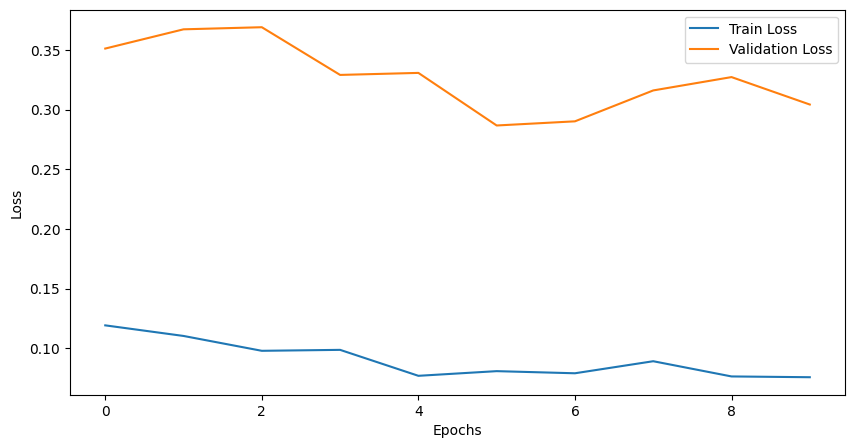

In [30]:

train_losses = []
val_losses = []


for epoch in range(num_epochs):
    simple_mobilenetv2.train()  

    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = simple_mobilenetv2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    
    simple_mobilenetv2.eval()  
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = simple_mobilenetv2(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

    
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}] Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')


plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Show the accuracy on training and validation sets

# Inference between test set and training

In [31]:

simple_mobilenetv2.eval()


test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


correct = 0
total = 0


ground_truth_labels = []
predicted_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = simple_mobilenetv2(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        ground_truth_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate accuracy
test_accuracy = (correct / total) * 100.0

print(f'Test Accuracy: {test_accuracy:.2f}%')




Test Accuracy: 91.01%


# Training and validation accuracy

In [32]:

train_correct = 0
train_total = 0
val_correct = 0
val_total = 0


simple_mobilenetv2.eval()


with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = simple_mobilenetv2(images)
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()


with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = simple_mobilenetv2(images)
        _, predicted = torch.max(outputs, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()


train_accuracy = 100 * train_correct / train_total
val_accuracy = 100 * val_correct / val_total

print(f'Training Accuracy: {train_accuracy:.2f}%')
print(f'Validation Accuracy: {val_accuracy:.2f}%')


Training Accuracy: 99.22%
Validation Accuracy: 92.14%


#### Save your trained CNN

In [33]:

model_path = 'TrainedFruitsToheed.pth'


torch.save(simple_mobilenetv2.state_dict(), model_path)


print(f"Model saved to {model_path}")

Model saved to TrainedFruitsToheed.pth


## 4. Evaluation and Testing
Load your trained CNN and evaluate it on the test set.
Show the confusion matrix on the test set.
Show some predictions on the test set (3 is enough) by plotting the image and printing the prediction and ground truth.
Show some missed predictions (3 is enough) and try to explain why it was difficult for the model to recognize these images.

#### Evaluate your model

In [34]:

model_path = 'TrainedFruitsToheed.pth'

model = SimpleMobileNetV2(num_classes) 

model.load_state_dict(torch.load(model_path))

model.eval()



SimpleMobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96

#### Show the test accuracy next to the training and validation

In [35]:

print(f'Training Accuracy: {train_accuracy:.2f}%')
print(f'Validation Accuracy: {val_accuracy:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')


Training Accuracy: 99.22%
Validation Accuracy: 92.14%
Test Accuracy: 91.01%


#### Confusion matrix

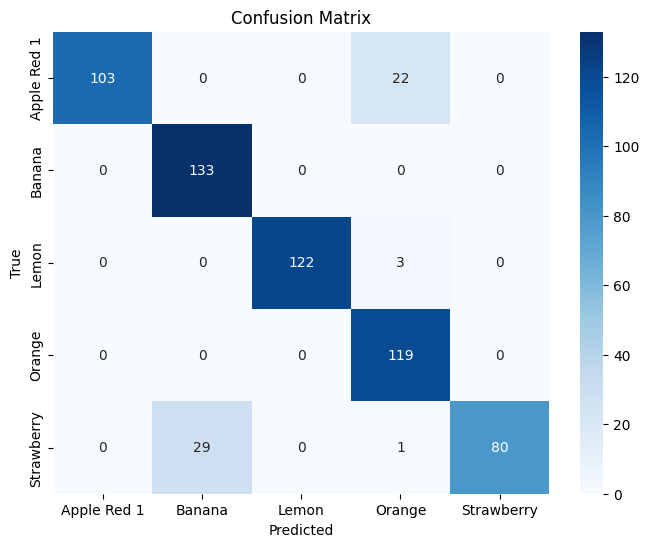

In [36]:

true_labels = []
predicted_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = simple_mobilenetv2(images)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())


cm = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Show some predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


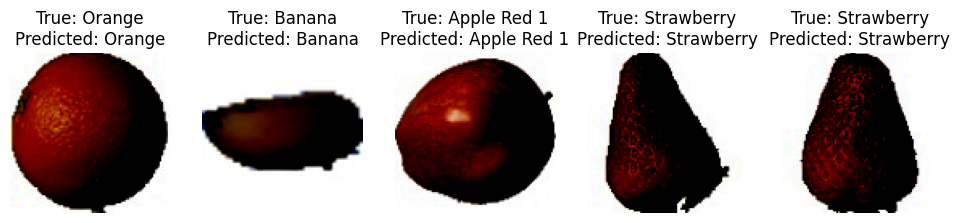

In [37]:

num_samples = 5  
selected_indices = random.sample(range(len(test_dataset)), num_samples)


true_labels = []
predicted_labels = []
sample_images = []


with torch.no_grad():
    for idx in selected_indices:
        image, true_label = test_dataset[idx]
        image = image.to(device).unsqueeze(0)  
        true_labels.append(classes[true_label])  
        outputs = simple_mobilenetv2(image)
        _, predicted_label = torch.max(outputs, 1)
        predicted_labels.append(classes[predicted_label.item()])

        
        sample_images.append(image.squeeze(0).cpu().numpy())


plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(np.transpose(sample_images[i], (1, 2, 0)))
    plt.title(f"True: {true_labels[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')

plt.show()

#### Missed predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


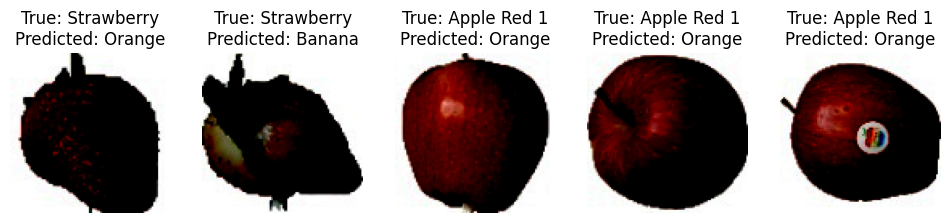

In [38]:

missed_true_labels = []
missed_predicted_labels = []
missed_images = []


with torch.no_grad():
    for idx in range(len(test_dataset)):
        image, true_label = test_dataset[idx]
        image = image.to(device).unsqueeze(0)  
        outputs = simple_mobilenetv2(image)
        _, predicted_label = torch.max(outputs, 1)
        if predicted_label != true_label:
            missed_true_labels.append(classes[true_label])  
            missed_predicted_labels.append(classes[predicted_label.item()])
            missed_images.append(image.squeeze(0).cpu().numpy())


if not missed_true_labels:
    print("No samples were missed. Accuracy is 100%.")
else:
    
    num_missed_samples = min(5, len(missed_true_labels))  
    selected_missed_indices = random.sample(range(len(missed_true_labels)), num_missed_samples)

    
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(selected_missed_indices):
        plt.subplot(1, num_missed_samples, i + 1)
        plt.imshow(np.transpose(missed_images[idx], (1, 2, 0)))
        plt.title(f"True: {missed_true_labels[idx]}\nPredicted: {missed_predicted_labels[idx]}")
        plt.axis('off')

    plt.show()
